In [289]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame

pd.options.display.max_rows = 999
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Load data, extract OFS number

In [381]:
df = pd.read_csv('raph.csv')
len(df)

311

In [291]:
df = pd.read_csv('raph.csv', header = [1], keep_default_na=False, skiprows=[2])

In [292]:
len(df)

309

In [293]:
df[:5]

,Unnamed: 0,Syndique (1) ou syndic (0),muni_total,muni_hommes,muni_femmes,Sièges vacants,Total,Hommes,Femmes,Total.1,...,Total.3,Hommes.1,Femmes.1,Total.4,Population suisse.1,Population étrangère.1,Total.5,0-19 ans.1,20-64 ans.1,65+ ans.1
0,5401 Aigle,0,5,3,2,,10153,4966,5187,10153,...,100,48.91,51.09,100,59.64,40.36,100,22.76,60.27,16.97
1,5402 Bex,0,7,6,1,,7719,3810,3909,7719,...,100,49.36,50.64,100,67.18,32.82,100,23.19,59.06,17.75
2,5403 Chessel,0,5,4,1,,403,214,189,403,...,100,53.10,46.90,100,83.87,16.13,100,22.83,62.28,14.89
3,5404 Corbeyrier,0,5,3,2,,437,227,210,437,...,100,51.95,48.05,100,91.53,8.47,100,18.99,50.80,30.21
4,5405 Gryon,0,5,5,0,,1364,720,644,1364,...,100,52.79,47.21,100,68.40,31.60,100,20.16,59.60,20.23


In [294]:
ofs = df['Unnamed: 0'].str.replace(' +', ' ').str.split(' ', expand=True)

In [382]:
len(ofs[0])

309

In [296]:
df['ofs'] = ofs[0]

In [297]:
df[:5]

,Unnamed: 0,Syndique (1) ou syndic (0),muni_total,muni_hommes,muni_femmes,Sièges vacants,Total,Hommes,Femmes,Total.1,...,Hommes.1,Femmes.1,Total.4,Population suisse.1,Population étrangère.1,Total.5,0-19 ans.1,20-64 ans.1,65+ ans.1,ofs
0,5401 Aigle,0,5,3,2,,10153,4966,5187,10153,...,48.91,51.09,100,59.64,40.36,100,22.76,60.27,16.97,5401
1,5402 Bex,0,7,6,1,,7719,3810,3909,7719,...,49.36,50.64,100,67.18,32.82,100,23.19,59.06,17.75,5402
2,5403 Chessel,0,5,4,1,,403,214,189,403,...,53.10,46.90,100,83.87,16.13,100,22.83,62.28,14.89,5403
3,5404 Corbeyrier,0,5,3,2,,437,227,210,437,...,51.95,48.05,100,91.53,8.47,100,18.99,50.80,30.21,5404
4,5405 Gryon,0,5,5,0,,1364,720,644,1364,...,52.79,47.21,100,68.40,31.60,100,20.16,59.60,20.23,5405


### Load clean OFS list to get clean city names

In [299]:
cities = pd.read_csv('communes_ofs.csv')

In [383]:
len(cities)

2222

In [301]:
df['ofs'] = pd.to_numeric(df['ofs'])


In [302]:
df_merge = df.merge(cities, left_on="ofs", right_on='GDENR')
len(df_merge)

309

In [303]:
#df_merge['muni_total'] = str(df_merge['muni_total'])
#df_merge['muni_hommes'] = str(df_merge['muni_hommes'])
#df_merge['muni_femmes'] = str(df_merge['muni_femmes'])
#df_merge['Syndique (1) ou syndic (0)'] = str(df_merge['Syndique (1) ou syndic (0)'])
#df_merge['Hommes'] = str(df_merge['Hommes'])
#df_merge['Femmes'] = str(df_merge['Femmes'])


### Load city limits

In [384]:
limits = gpd.read_file('vd_communes.geojson')
len(limits)

315

In [305]:
limits.crs

{'init': 'epsg:4326'}

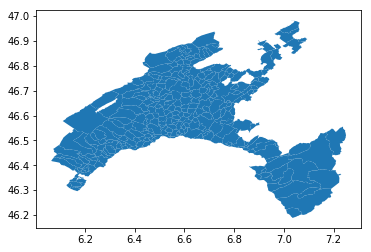

In [306]:
limits.plot()

In [387]:
len(df_merge)

309

### Plot stuff

In [392]:
df_final = df_merge.merge(limits, left_on='GDENR', right_on='BFS_NUMMER')
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(df_final, crs=crs, geometry='geometry')
gdf = gdf.to_crs({'init': 'epsg:21781'})

315

#### 1. Communes with female syndique

In [309]:
gdf = gdf.to_crs({'init': 'epsg:21781'})

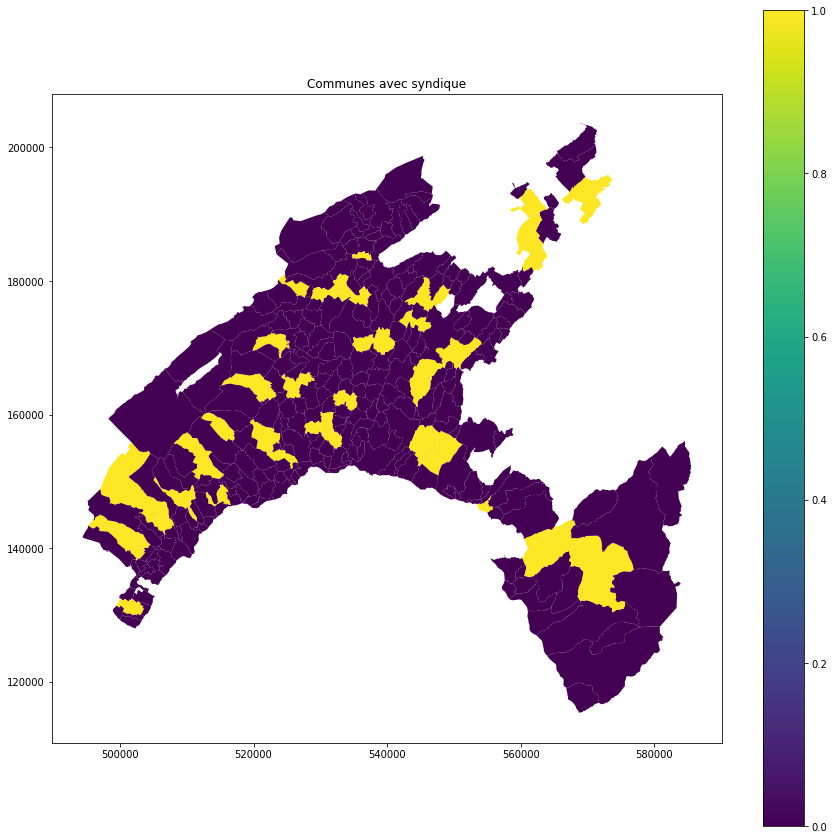

In [520]:
gdf.plot(column = 'Syndique (1) ou syndic (0)', legend = True, figsize=(15,15))
plt.title('Communes avec syndique')
plt.colorbar
plt.savefig('img/syndiques.png')

#### 2. Number of female municipales per commune

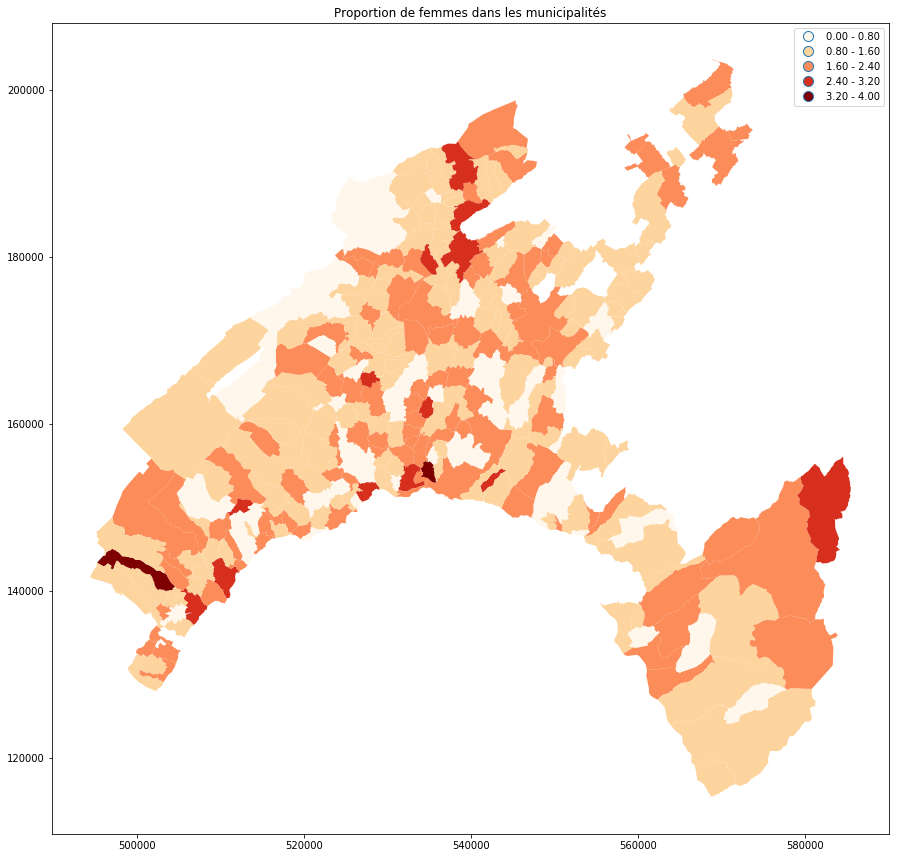

In [318]:
gdf.plot(column = 'muni_femmes', cmap='OrRd', legend = True, scheme='equal_interval', k=5, figsize = (15,15))
plt.title('Proportion de femmes dans les municipalités')


plt.savefig('img/femmes.png')

#### Répartition par district

In [401]:
# Nombre de femmes syndiques dans le canton pour 309 communes
df_merge['Syndique (1) ou syndic (0)'].sum()

47

In [393]:
# Nombre de femmes syndiques par district
df_merge.groupby(['GDEBZNA'])['Syndique (1) ou syndic (0)'].sum().sort_index()

GDEBZNA
District d'Aigle                         2
District de Lausanne                     0
District de Lavaux-Oron                  2
District de Morges                       9
District de Nyon                        10
District de l'Ouest lausannois           1
District de la Broye-Vully               5
District de la Riviera-Pays-d'Enhaut     2
District du Gros-de-Vaud                 8
District du Jura-Nord vaudois            8
Name: Syndique (1) ou syndic (0), dtype: int64

In [400]:
# Nombre de communes par district
df_merge['GDEBZNA'].value_counts().sort_index()

District d'Aigle                        15
District de Lausanne                     6
District de Lavaux-Oron                 17
District de Morges                      62
District de Nyon                        47
District de l'Ouest lausannois           8
District de la Broye-Vully              31
District de la Riviera-Pays-d'Enhaut    13
District du Gros-de-Vaud                37
District du Jura-Nord vaudois           73
Name: GDEBZNA, dtype: int64

In [395]:
# Pourcentage de communes par district
per = df_merge['GDEBZNA'].value_counts()/len(gdf) * 100
round(per, 2).sort_index()

District d'Aigle                         4.76
District de Lausanne                     1.90
District de Lavaux-Oron                  5.40
District de Morges                      19.68
District de Nyon                        14.92
District de l'Ouest lausannois           2.54
District de la Broye-Vully               9.84
District de la Riviera-Pays-d'Enhaut     4.13
District du Gros-de-Vaud                11.75
District du Jura-Nord vaudois           23.17
Name: GDEBZNA, dtype: float64

In [406]:
# Pourcentage de communes ayant une femme syndique par district

dis = df_merge.groupby(['GDEBZNA'])['Syndique (1) ou syndic (0)'].sum()/ df_merge['GDEBZNA'].value_counts()
round(dis * 100, 2).sort_index()


District d'Aigle                        13.33
District de Lausanne                     0.00
District de Lavaux-Oron                 11.76
District de Morges                      14.52
District de Nyon                        21.28
District de l'Ouest lausannois          12.50
District de la Broye-Vully              16.13
District de la Riviera-Pays-d'Enhaut    15.38
District du Gros-de-Vaud                21.62
District du Jura-Nord vaudois           10.96
dtype: float64

In [ ]:
# --> La proportion de femmes syndiques dans les districts de Nyon et du Gros-de-Vaud est plus haute qu'ailleurs


#### Municipales par communes

In [408]:
# Nombre de municipales
df_merge['muni_femmes'].sum()

381

In [410]:
#Nombre de municipaux hommes
df_merge['muni_hommes'].sum()

1231

In [413]:
# Nombre de municipaux en fonction actuellement
df_merge['muni_femmes'].sum() + df_merge['muni_hommes'].sum()

1612

In [425]:
# Pourcentage de municipales à la Municipalité

df_merge['total_municipaux'] = df_merge['muni_femmes'] + df_merge['muni_hommes']
df_merge['perc_municipales'] = round(df_merge['muni_femmes'] / df_merge['total_municipaux'] * 100, 2)

In [475]:
# Nombre de municipaux en fonction sans les sièges vacants
df_merge['total_municipaux'].sum()

1612

In [426]:
# plot percentage of women in muni

In [469]:
df_merge['cat_perc_municipales'] = pd.cut(df_merge['perc_municipales'], [-1,25,50, 60], labels=["0-25%", "25-50%", "50% et au-delà"])


In [470]:
df_final = df_merge.merge(limits, left_on='GDENR', right_on='BFS_NUMMER')
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(df_final, crs=crs, geometry='geometry')
gdf = gdf.to_crs({'init': 'epsg:21781'})

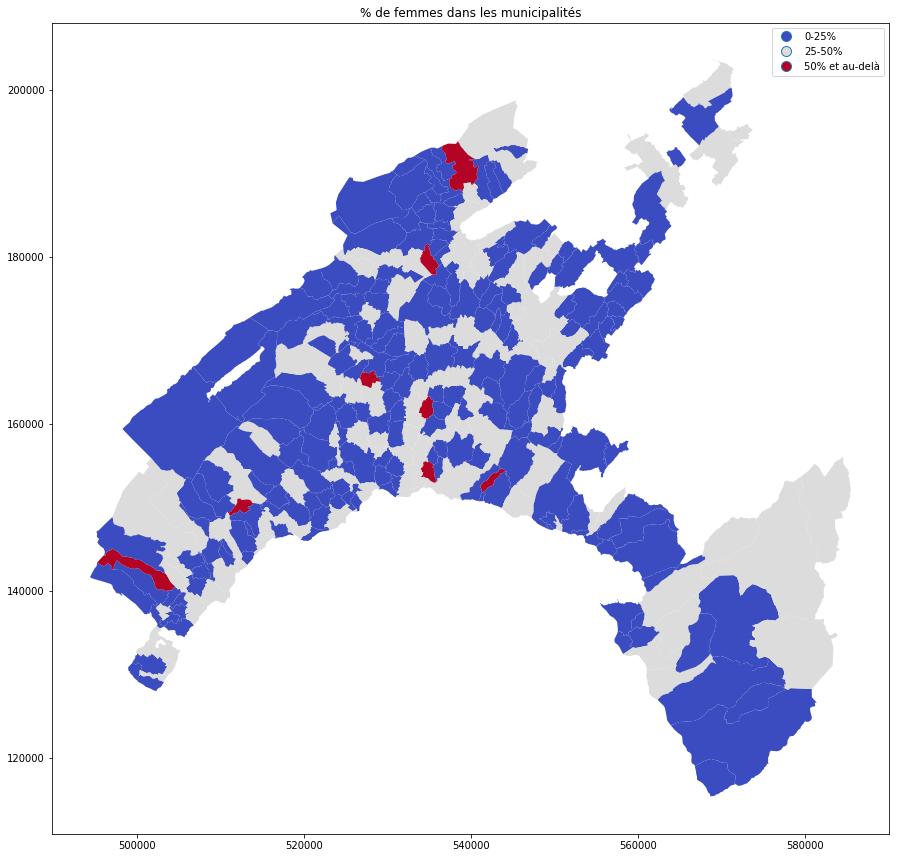

In [473]:
gdf.plot(column = 'cat_perc_municipales', cmap='coolwarm', categorical = True, legend = True, figsize = (15,15))
plt.title('% de femmes dans les municipalités')


plt.savefig('img/%femmes.png')

#### Autre stats

In [477]:
df_merge.keys()

Index(['Unnamed: 0', 'Syndique (1) ou syndic (0)', 'muni_total', 'muni_hommes',
       'muni_femmes', 'Sièges vacants', 'Total', 'Hommes', 'Femmes', 'Total.1',
       'Population suisse', 'Population étrangère', 'Total.2', '0-19 ans',
       '20-64 ans', '65+ ans', 'Total.3', 'Hommes.1', 'Femmes.1', 'Total.4',
       'Population suisse.1', 'Population étrangère.1', 'Total.5',
       '0-19 ans.1', '20-64 ans.1', '65+ ans.1', 'ofs', 'GDEKT', 'GDEBZNR',
       'GDENR', 'GDENAME', 'GDENAMK', 'GDEBZNA', 'GDEKTNA', 'GDEMUTDAT',
       'total_municipaux', 'perc_municipales', 'cat_', 'cat_perc_municipales'],
      dtype='object')

In [478]:
# Nombre de sièges dans les municipalités
df_merge['muni_total'].value_counts()

5    267
7     37
3      3
9      2
Name: muni_total, dtype: int64

In [479]:
267+37+5

309

#### Combien de municipalités à 3 H/0F, 2H/1F, 5H/0F, 4H/1F, 3H/2F, 2H/3F, 7H/0F...?

In [499]:
df_merge['formation_muni'] = df_merge['muni_hommes'].apply(str) + "-"+ df_merge['muni_femmes'].apply(str)

In [501]:
# Composition homme-femme des municipalités
df_merge['formation_muni'].value_counts()

4-1    129
3-2     75
5-0     48
5-2     17
6-1      9
4-3      7
2-3      6
3-1      4
4-0      3
3-0      2
2-2      2
7-0      2
3-4      2
8-1      1
2-1      1
7-2      1
Name: formation_muni, dtype: int64

#### Influence de la présence des partis (communes de + de 3000 habitants)

In [502]:
df_merge['partis'] = pd.cut(df_merge['Total'], [-1,3000,140000], labels=["Moins de 3000 habitants", "Plus de 3000 habitants"])

In [505]:
# Nombre de communes avec des partis
df_merge['partis'].value_counts()

Moins de 3000 habitants    252
Plus de 3000 habitants      57
Name: partis, dtype: int64

In [508]:
df_merge.keys()

Index(['Unnamed: 0', 'Syndique (1) ou syndic (0)', 'muni_total', 'muni_hommes',
       'muni_femmes', 'Sièges vacants', 'Total', 'Hommes', 'Femmes', 'Total.1',
       'Population suisse', 'Population étrangère', 'Total.2', '0-19 ans',
       '20-64 ans', '65+ ans', 'Total.3', 'Hommes.1', 'Femmes.1', 'Total.4',
       'Population suisse.1', 'Population étrangère.1', 'Total.5',
       '0-19 ans.1', '20-64 ans.1', '65+ ans.1', 'ofs', 'GDEKT', 'GDEBZNR',
       'GDENR', 'GDENAME', 'GDENAMK', 'GDEBZNA', 'GDEKTNA', 'GDEMUTDAT',
       'total_municipaux', 'perc_municipales', 'cat_', 'cat_perc_municipales',
       'formation_muni', 'partis'],
      dtype='object')

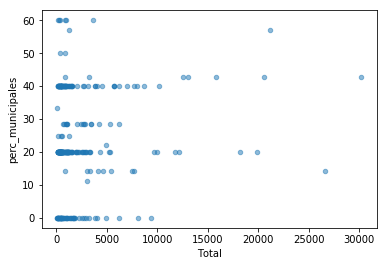

In [515]:
df_50 = df_merge[df_merge['Total'] < 50000]
df_50.plot(kind="scatter", x='Total', y='perc_municipales', alpha = 0.5)


#### Influence du statut de ville (commune de +/- 10'000 habitants)

In [ ]:
df_merge['partis'] = pd.cut(df_merge['Total'], [-1,3000,140000], labels=["Moins de 3000 habitants", "Plus de 3000 habitants"])



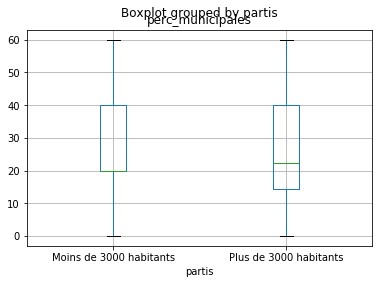

In [521]:
df_merge.boxplot(column="perc_municipales", by='partis')
plt.savefig('img/boxplot_influence_partis.png')

In [524]:
df_merge['perc_municipales'].sort_values()

60      0.00
79      0.00
280     0.00
77      0.00
74      0.00
160     0.00
162     0.00
163     0.00
69      0.00
254     0.00
173     0.00
59      0.00
52      0.00
188     0.00
44      0.00
42      0.00
82      0.00
153     0.00
258     0.00
151     0.00
269     0.00
128     0.00
112     0.00
266     0.00
110     0.00
109     0.00
271     0.00
40      0.00
104     0.00
101     0.00
135     0.00
137     0.00
140     0.00
259     0.00
87      0.00
150     0.00
134     0.00
39      0.00
121     0.00
235     0.00
217     0.00
221     0.00
23      0.00
24      0.00
209     0.00
230     0.00
298     0.00
229     0.00
4       0.00
208     0.00
6       0.00
12      0.00
220     0.00
305     0.00
226     0.00
249    11.11
274    14.29
1      14.29
268    14.29
237    14.29
8      14.29
267    14.29
164    14.29
34     14.29
308    14.29
264    20.00
124    20.00
234    20.00
223    20.00
260    20.00
132    20.00
146    20.00
145    20.00
139    20.00
233    20.00
143    20.00
225    20.00

In [ ]:
# --> Dans les communes de moins de 3000 habitants, la moitié ont un taux de municipales entre 20 et 40%
# Dans les communes de plus de 3000 habitants, la moitié ont un taux de municipales entre environ 15% et 40%
# Pas d'effet notable du cap de 3000 habitants